. Build a machine learning model to predict salary based on experience for
a given dataset


## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing dataset

In [2]:
dataset=pd.read_csv("Salary_Data.csv")

In [3]:
dataset.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
dataset.shape

(30, 2)

In [5]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


## Data Preprocessing

### Checking for null value

In [7]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### Checking for outlier

<AxesSubplot:>

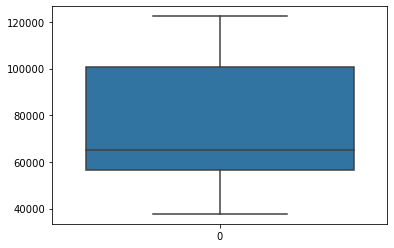

In [8]:
sns.boxplot(data=dataset["Salary"])

<AxesSubplot:>

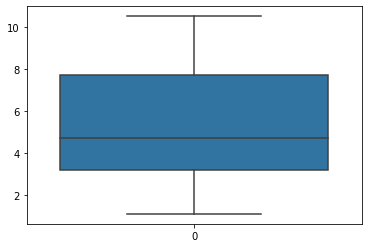

In [9]:
sns.boxplot(data=dataset["YearsExperience"])

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc_x=StandardScaler()
dataset=sc_x.fit_transform(dataset)


In [14]:
#split data into independent and dependent variable
x=dataset[:,:-1]
y=dataset[:,-1]

In [15]:
x

array([[-1.51005294],
       [-1.43837321],
       [-1.36669348],
       [-1.18749416],
       [-1.11581443],
       [-0.86493538],
       [-0.82909552],
       [-0.75741579],
       [-0.75741579],
       [-0.57821647],
       [-0.50653674],
       [-0.47069688],
       [-0.47069688],
       [-0.43485702],
       [-0.29149756],
       [-0.1481381 ],
       [-0.07645838],
       [-0.00477865],
       [ 0.21026054],
       [ 0.2461004 ],
       [ 0.53281931],
       [ 0.6403389 ],
       [ 0.92705781],
       [ 1.03457741],
       [ 1.21377673],
       [ 1.32129632],
       [ 1.50049564],
       [ 1.5363355 ],
       [ 1.78721455],
       [ 1.85889428]])

In [16]:
y

array([-1.36011263, -1.10552744, -1.419919  , -1.20495739, -1.33978143,
       -0.71830716, -0.58815781, -0.79981746, -0.42881019, -0.69801306,
       -0.47433279, -0.74976858, -0.70662043, -0.70201994, -0.55250402,
       -0.29921736, -0.37004264,  0.26285865,  0.19885989,  0.66547573,
        0.58377993,  0.82623317,  0.93861127,  1.40274136,  1.24020308,
        1.09740238,  1.51986835,  1.3590738 ,  1.72102849,  1.70177321])

## Data train test split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [19]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((22, 1), (8, 1), (22,), (8,))

## Model building

In [20]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression

In [21]:
lr=LinearRegression()

In [22]:
lr.fit(x_train,y_train)

LinearRegression()

In [23]:
y_train_pred=lr.predict(x_train)

In [24]:
R2_score=r2_score(y_train,y_train_pred)
R2_score

0.9395413526983523

In [25]:
y_test_pred=lr.predict(x_test)

In [26]:
R2_score=r2_score(y_test,y_test_pred)
R2_score

0.9779208335417602

In [27]:
Mean_Squared_Error=mean_squared_error(y_test,y_test_pred)
Mean_Squared_Error

0.03084372046005695

In [28]:
MeanAbsoluteError=mean_absolute_error(y_test,y_test_pred)
MeanAbsoluteError

0.13016958967275322